In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [168]:
dfTweets = pd.read_csv('../data/preprocessedTweets.csv')

dfTweets.drop(['Unnamed: 0'], axis=1, inplace=True)

In [169]:
dfTweets.columns

Index(['Unnamed: 0.1', 'Date', 'TweetURL', 'User', 'Source', 'Location',
       'Tweet', 'Likes_Count', 'Retweet_Count', 'Quote_Count', 'Reply_Count',
       'compoundVader', 'compoundTextBlob', 'compoundRoBERTa', 'Tweet_NLTK',
       'Sentiment'],
      dtype='object')

In [170]:
dfMarket = pd.read_csv('../data/price_mining.csv')

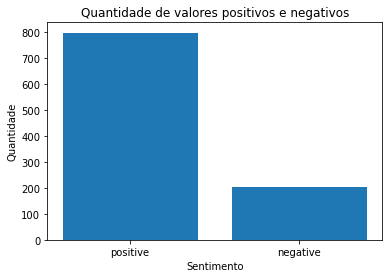

In [171]:
# Contar a quantidade de valores positivos e negativos
count = dfTweets["Sentiment"].value_counts()

# Criar o gráfico de barras
plt.bar(count.index, count.values)

# Adicionar títulos e rótulos dos eixos
plt.title("Quantidade de valores positivos e negativos")
plt.xlabel("Sentimento")
plt.ylabel("Quantidade")

# Mostrar o gráfico
plt.show()

#### Bullish Ratio analysis

Tweet’s bullish ratio is known as the number of positive tweets over a number of negative tweets.

A bullish ratio greater than one indicates audiences’ belief that the cryptocurrency’s return will increase. Otherwise, a value lower than one shows greater negativity towards the cryptocurrency and the market will be pulled back in near future

In [172]:
bullishRatio = count[0] / count[1]
print("Razão de tweets positivos para negativos: ", bullishRatio)

Razão de tweets positivos para negativos:  3.9504950495049505


#### Cast tweets date to datetime type

In [173]:
dfTweets["Date"] = pd.to_datetime(dfTweets["Date"])

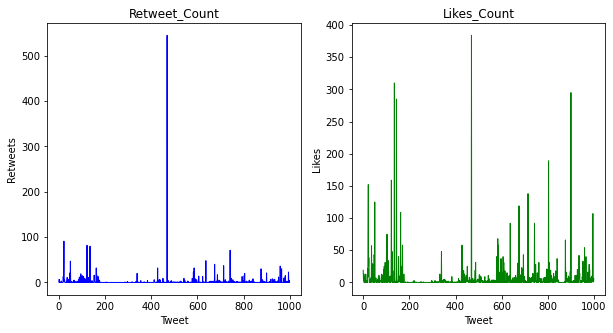

In [174]:
# Definir tamanho da figura
plt.figure(figsize=(10, 5))

# Primeiro gráfico para Retweet_Count
plt.subplot(1, 2, 1)
plt.plot(dfTweets["Retweet_Count"], color="blue", linewidth=1)
plt.title("Retweet_Count")
plt.xlabel("Tweet")
plt.ylabel("Retweets")

# Segundo gráfico para Likes_Count
plt.subplot(1, 2, 2)
plt.plot(dfTweets["Likes_Count"], color="green", linewidth=1)
plt.title("Likes_Count")
plt.xlabel("Tweet")
plt.ylabel("Likes")

# Exibir os gráficos
plt.show()


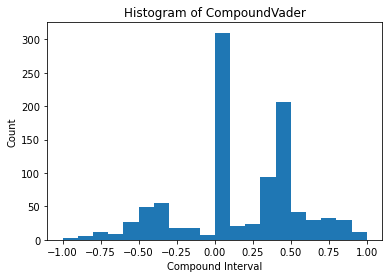

In [175]:
import matplotlib.pyplot as plt
import numpy as np

# Criando os intervalos de 0,1 de -1 a 1
bins = np.arange(-1, 1.1, 0.1)

# Plotando o gráfico de barras
plt.hist(dfTweets['compoundVader'], bins=bins)
plt.xlabel('Compound Interval')
plt.ylabel('Count')
plt.title('Histogram of CompoundVader')
plt.show()


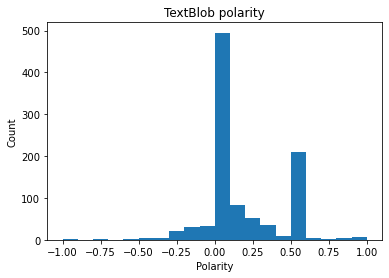

In [176]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# aplicando expressão regular para extrair o valor da polaridade
dfTweets['polarity'] = dfTweets['compoundTextBlob'].apply(lambda x: float(re.search(r'polarity=(-?\d+\.?\d*)', x).group(1)))

# criando um histograma com a polaridade
fig, ax = plt.subplots()
ax.set_title('TextBlob polarity')
ax.hist(dfTweets['polarity'], bins=20)
ax.set_xlabel('Polarity')
ax.set_ylabel('Count')
plt.show()


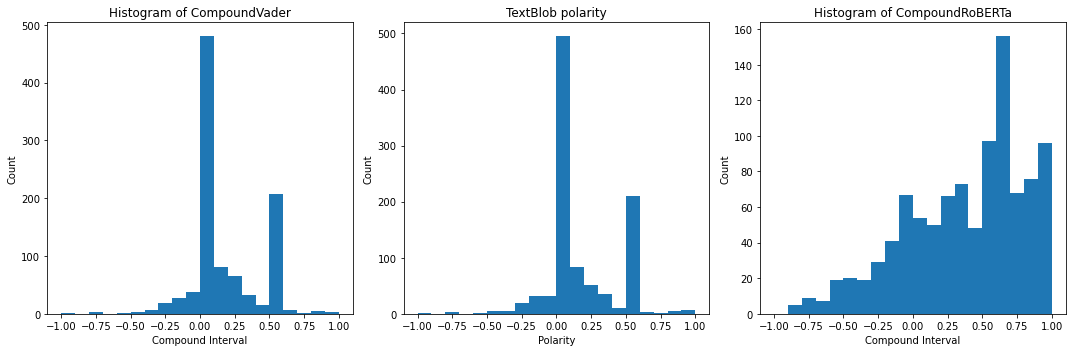

In [177]:

# Definir os bins para o histograma
bins = np.arange(-1, 1.1, 0.1)

# Criar a figura e os subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plotar o gráfico de barras do histograma no primeiro subplot
dfTweets['polarity'] = dfTweets['compoundTextBlob'].apply(lambda x: float(re.search(r'polarity=(-?\d+\.?\d*)', x).group(1)))
ax1.hist(dfTweets['polarity'], bins=bins)
ax1.set_xlabel('Compound Interval')
ax1.set_ylabel('Count')
ax1.set_title('Histogram of CompoundVader')

# Plotar o gráfico de linha dos valores da primeira coluna no segundo subplot
dfTweets['polarity'] = dfTweets['compoundTextBlob'].apply(lambda x: float(re.search(r'polarity=(-?\d+\.?\d*)', x).group(1)))

# criando um histograma com a polaridade
ax2.set_title('TextBlob polarity')
ax2.hist(dfTweets['polarity'], bins=20)
ax2.set_xlabel('Polarity')
ax2.set_ylabel('Count')

# Plotar o gráfico de linha dos valores da segunda coluna no terceiro subplot
ax3.hist(dfTweets['compoundRoBERTa'], bins=bins)
ax3.set_xlabel('Compound Interval')
ax3.set_ylabel('Count')
ax3.set_title('Histogram of CompoundRoBERTa')

# Ajustar a posição dos subplots
plt.tight_layout()

# Exibir a figura com os três subplots lado a lado
plt.show()

#### Check variation between roBERTa and Vader compound

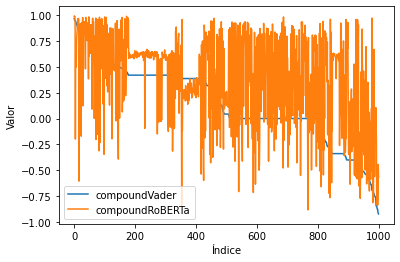

In [178]:
import matplotlib.pyplot as plt

# Extrair os valores das colunas
compound_vader = dfTweets['compoundVader']
compound_roberta = dfTweets['compoundRoBERTa']

# Criar um array para representar os índices dos dados (eixo x)
indices = range(len(dfTweets))

# Criar um gráfico de linha com os valores das duas colunas
plt.plot(indices, compound_vader, label='compoundVader')
plt.plot(indices, compound_roberta, label='compoundRoBERTa')

# Definir rótulos dos eixos
plt.xlabel('Índice')
plt.ylabel('Valor')

# Adicionar uma legenda
plt.legend()

# Exibir o gráfico
plt.show()


#### Check compound variance over time

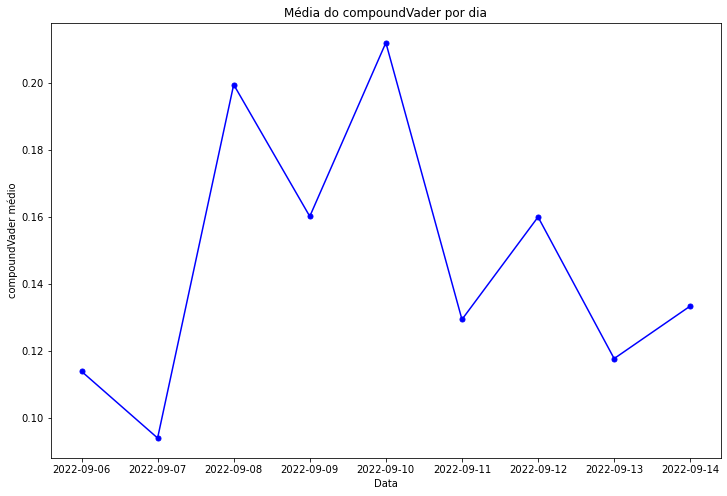

In [179]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date']).dt.date

df_daily = dfTweets.groupby('Date')['compoundVader'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df_daily['Date'], df_daily['compoundVader'], color='blue', marker='o', markersize=5)

ax.set_xlabel('Data')
ax.set_ylabel('compoundVader médio')
ax.set_title('Média do compoundVader por dia')
plt.show()


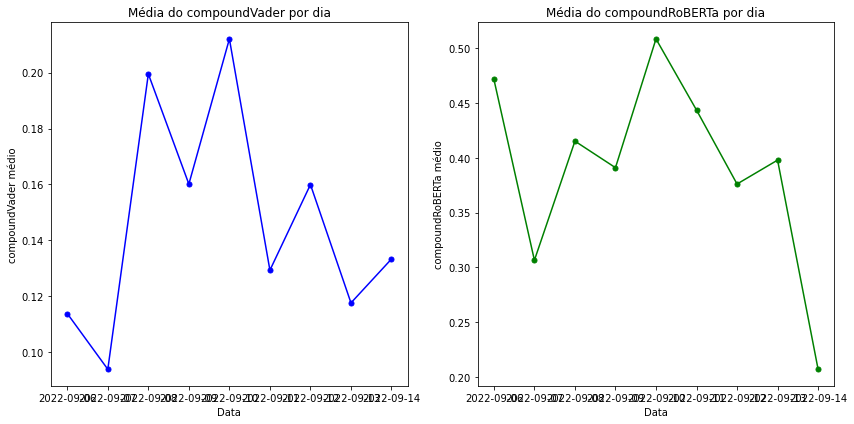

In [180]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date']).dt.date

df_daily_vader = dfTweets.groupby('Date')['compoundVader'].mean().reset_index()
df_daily_roberta = dfTweets.groupby('Date')['compoundRoBERTa'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(df_daily_vader['Date'], df_daily_vader['compoundVader'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundVader médio')
ax1.set_title('Média do compoundVader por dia')

ax2.plot(df_daily_roberta['Date'], df_daily_roberta['compoundRoBERTa'], color='green', marker='o', markersize=5)
ax2.set_xlabel('Data')
ax2.set_ylabel('compoundRoBERTa médio')
ax2.set_title('Média do compoundRoBERTa por dia')

plt.tight_layout()
plt.show()


#### Check price variance over time

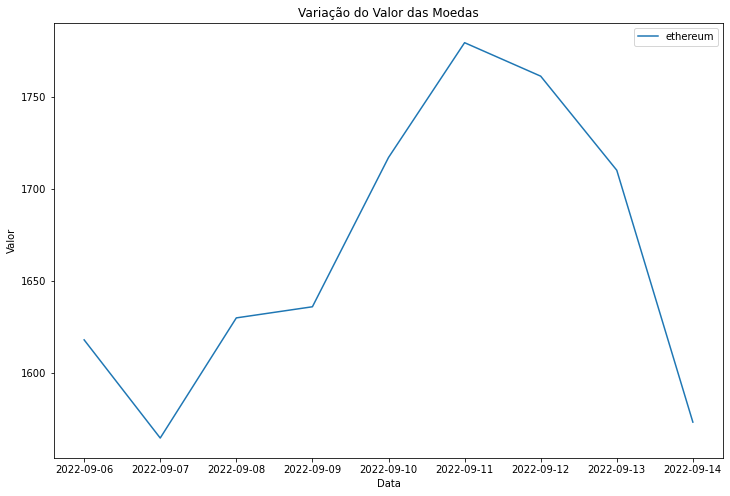

In [181]:
dfMarket = dfMarket[(dfMarket['datetime'] >= '2022-09-06') & (dfMarket['datetime'] <= '2022-09-14')]


df_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].agg('mean').reset_index()


fig, ax = plt.subplots(figsize=(12, 8))

for currency in df_daily['currency_name'].unique():
    df_currency = df_daily[df_daily['currency_name'] == currency]
    ax.plot(df_currency['Date'], df_currency['Value'], label=currency)

ax.set_xlabel('Data')
ax.set_ylabel('Valor')
ax.set_title('Variação do Valor das Moedas')
ax.legend()
plt.show()


#### Gráfico comparativo entre Sentimento dos tweets e valor da Criptomoeda

- compoundVader

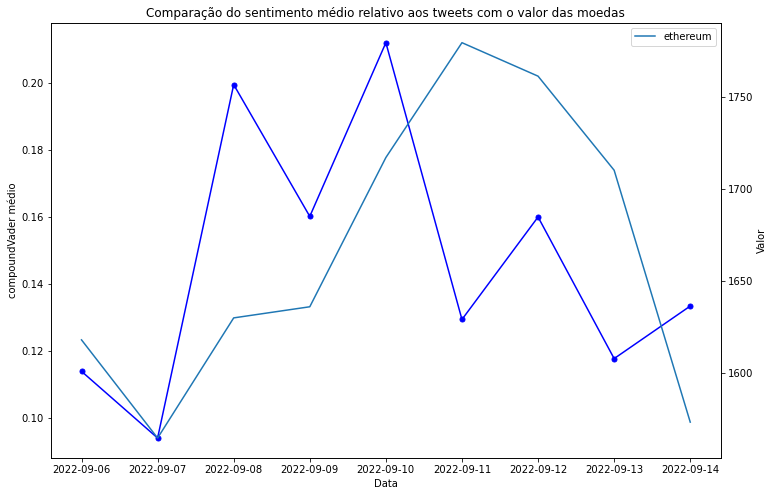

In [182]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])



df_tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundVader'].mean().reset_index()
df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()



fig, ax1 = plt.subplots(figsize=(12,8))
# plotar o gráfico para a média do compoundVader
ax1.plot(df_tweets_daily['Date'], df_tweets_daily['compoundVader'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundVader médio')
ax1.set_title('Comparação do sentimento médio relativo aos tweets com o valor das moedas')

# criar um segundo eixo y para o valor médio das moedas
ax2 = ax1.twinx()

# plotar o gráfico para o valor médio das moedas
for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)
    
ax2.set_ylabel('Valor')
ax2.legend()
plt.show()


- compoundRoBERTa

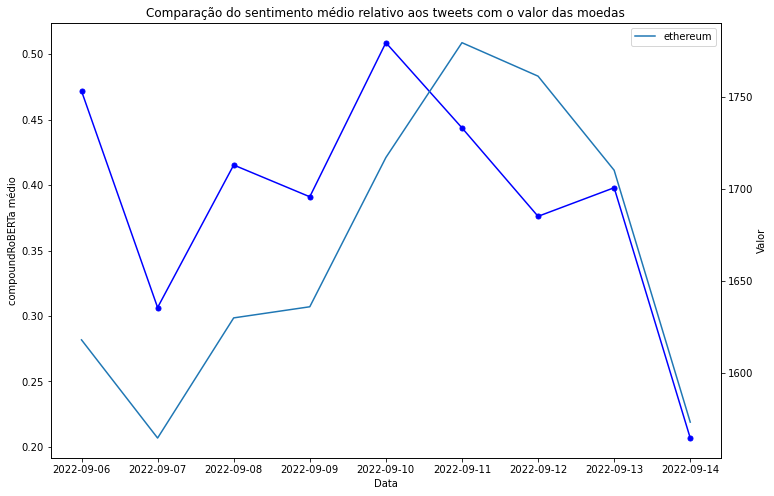

In [183]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])



df_tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundRoBERTa'].mean().reset_index()
df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()



fig, ax1 = plt.subplots(figsize=(12,8))
# plotar o gráfico para a média do compoundVader
ax1.plot(df_tweets_daily['Date'], df_tweets_daily['compoundRoBERTa'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundRoBERTa médio')
ax1.set_title('Comparação do sentimento médio relativo aos tweets com o valor das moedas')

# criar um segundo eixo y para o valor médio das moedas
ax2 = ax1.twinx()

# plotar o gráfico para o valor médio das moedas
for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)
    
ax2.set_ylabel('Valor')
ax2.legend()
plt.show()


##### Agora aplicando um atraso de 1 dia no preço da criptomoeda

- compoundVader

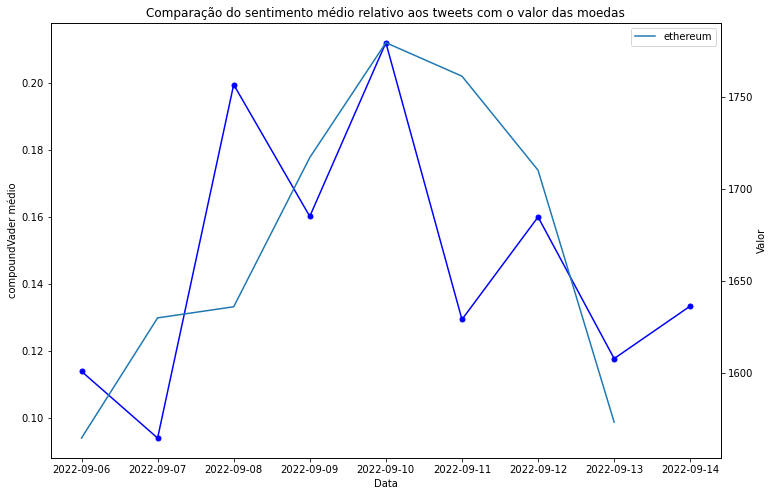

In [184]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])

df_tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundVader'].mean().reset_index()

df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()
df_market_daily['Value'] = df_market_daily.groupby('currency_name')['Value'].shift(-1)      # Passar um dia para trás os dados do valor de mercado

fig, ax1 = plt.subplots(figsize=(12,8))

# plotar o gráfico para a média do compoundVader
ax1.plot(df_tweets_daily['Date'], df_tweets_daily['compoundVader'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundVader médio')
ax1.set_title('Comparação do sentimento médio relativo aos tweets com o valor das moedas')

# criar um segundo eixo y para o valor médio das moedas
ax2 = ax1.twinx()

# plotar o gráfico para o valor médio das moedas
for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)
    
ax2.set_ylabel('Valor')
ax2.legend()
plt.show()


- compoundRoBERTa

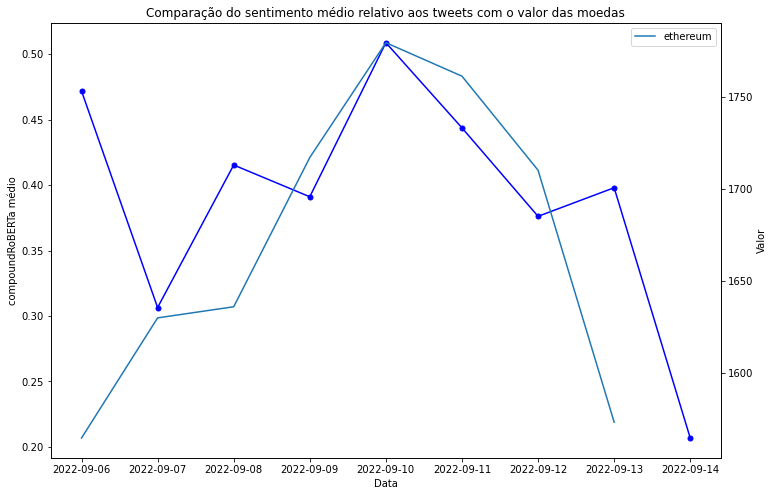

In [185]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])

df_tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundRoBERTa'].mean().reset_index()

df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()
df_market_daily['Value'] = df_market_daily.groupby('currency_name')['Value'].shift(-1)      # Passar um dia para trás os dados do valor de mercado

fig, ax1 = plt.subplots(figsize=(12,8))

# plotar o gráfico para a média do compoundVader
ax1.plot(df_tweets_daily['Date'], df_tweets_daily['compoundRoBERTa'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundRoBERTa médio')
ax1.set_title('Comparação do sentimento médio relativo aos tweets com o valor das moedas')

# criar um segundo eixo y para o valor médio das moedas
ax2 = ax1.twinx()

# plotar o gráfico para o valor médio das moedas
for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)
    
ax2.set_ylabel('Valor')
ax2.legend()
plt.show()


#### Agora aplicando um atraso de 2 dias no preço da criptomoeda

- compoundVader

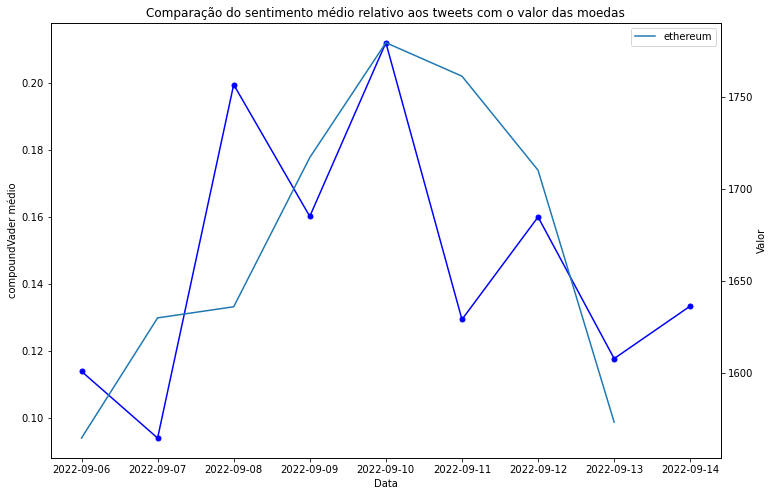

In [186]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])

df_tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundVader'].mean().reset_index()

df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()
df_market_daily['Value'] = df_market_daily.groupby('currency_name')['Value'].shift(-1)      # Passar um dia para trás os dados do valor de mercado

fig, ax1 = plt.subplots(figsize=(12,8))

# plotar o gráfico para a média do compoundVader
ax1.plot(df_tweets_daily['Date'], df_tweets_daily['compoundVader'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundVader médio')
ax1.set_title('Comparação do sentimento médio relativo aos tweets com o valor das moedas')

# criar um segundo eixo y para o valor médio das moedas
ax2 = ax1.twinx()

# plotar o gráfico para o valor médio das moedas
for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)
    
ax2.set_ylabel('Valor')
ax2.legend()
plt.show()

- compoundRoBERTa

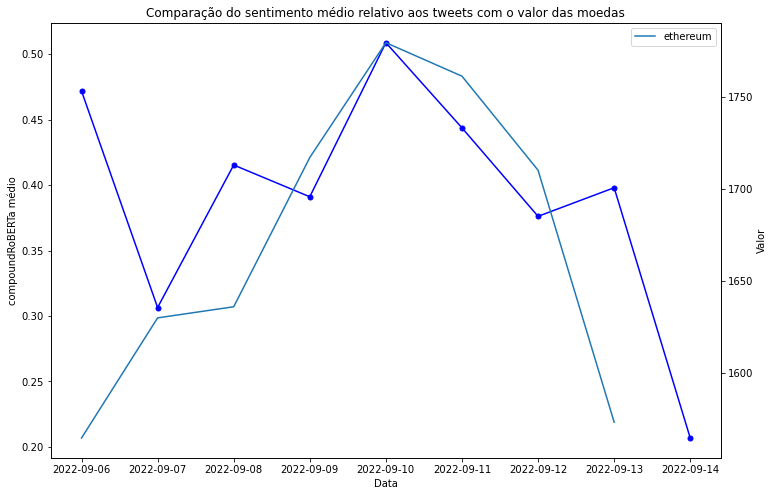

In [187]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])

df_tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundRoBERTa'].mean().reset_index()

df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()
df_market_daily['Value'] = df_market_daily.groupby('currency_name')['Value'].shift(-1)      # Passar um dia para trás os dados do valor de mercado

fig, ax1 = plt.subplots(figsize=(12,8))

# plotar o gráfico para a média do compoundVader
ax1.plot(df_tweets_daily['Date'], df_tweets_daily['compoundRoBERTa'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundRoBERTa médio')
ax1.set_title('Comparação do sentimento médio relativo aos tweets com o valor das moedas')

# criar um segundo eixo y para o valor médio das moedas
ax2 = ax1.twinx()

# plotar o gráfico para o valor médio das moedas
for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)
    
ax2.set_ylabel('Valor')
ax2.legend()
plt.show()

#### Calculate correlation between both

- compoundVader

In [188]:
# Agrupa os dados da criptomoeda por dia e calcula a média diária do valor
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

# Agrupa os dados dos tweets por dia e calcula a contagem diária e a média diária do compoundVader
dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundVader': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

# Junta os dados da criptomoeda e dos tweets em uma só tabela, usando a coluna 'Date' como chave
df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

# Calcula a correlação entre o valor diário da criptomoeda e a média diária do compoundVader
corr = df_merged['Value'].corr(df_merged['compoundVader'])

print('Correlação: {:.2f}'.format(corr))

Correlação: 0.29


- compoundRoBERTa

In [189]:
# Agrupa os dados da criptomoeda por dia e calcula a média diária do valor
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

# Agrupa os dados dos tweets por dia e calcula a contagem diária e a média diária do compoundVader
dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundRoBERTa': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

# Junta os dados da criptomoeda e dos tweets em uma só tabela, usando a coluna 'Date' como chave
df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

# Calcula a correlação entre o valor diário da criptomoeda e a média diária do compoundVader
corr = df_merged['Value'].corr(df_merged['compoundRoBERTa'])

print('Correlação: {:.2f}'.format(corr))

Correlação: 0.56


#### Calcular a correlação com um atraso de 1 dia

- compoundVader

In [190]:
# Agrupa os dados da criptomoeda por dia e calcula a média diária do valor
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

# Criar uma nova coluna com os valores de 'Value' deslocados para cima em 2 posições
dfMarket_daily['Value_shifted'] = dfMarket_daily['Value'].shift(-1)

# Agrupa os dados dos tweets por dia e calcula a contagem diária e a média diária do compoundVader
dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundVader': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

# Junta os dados da criptomoeda e dos tweets em uma só tabela, usando a coluna 'Date' como chave
df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

# Calcula a correlação entre o valor diário da criptomoeda com atraso de 2 dias e a média diária do compoundVader
corr = df_merged['Value_shifted'].corr(df_merged['compoundVader'])

print('Correlação com atraso de 1 dia: {:.2f}'.format(corr))


Correlação com atraso de 1 dia: 0.55


- compoundRoBERTa

In [191]:
# Agrupa os dados da criptomoeda por dia e calcula a média diária do valor
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

# Criar uma nova coluna com os valores de 'Value' deslocados para cima em 2 posições
dfMarket_daily['Value_shifted'] = dfMarket_daily['Value'].shift(-1)

# Agrupa os dados dos tweets por dia e calcula a contagem diária e a média diária do compoundVader
dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundRoBERTa': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

# Junta os dados da criptomoeda e dos tweets em uma só tabela, usando a coluna 'Date' como chave
df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

# Calcula a correlação entre o valor diário da criptomoeda com atraso de 2 dias e a média diária do compoundVader
corr = df_merged['Value_shifted'].corr(df_merged['compoundRoBERTa'])

print('Correlação com atraso de 1 dia: {:.2f}'.format(corr))


Correlação com atraso de 1 dia: 0.29


#### Correlação com atraso de 2 dias

- compoundVader

In [192]:
# Agrupa os dados da criptomoeda por dia e calcula a média diária do valor
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

# Criar uma nova coluna com os valores de 'Value' deslocados para cima em 2 posições
dfMarket_daily['Value_shifted'] = dfMarket_daily['Value'].shift(-2)

# Agrupa os dados dos tweets por dia e calcula a contagem diária e a média diária do compoundVader
dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundVader': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

# Junta os dados da criptomoeda e dos tweets em uma só tabela, usando a coluna 'Date' como chave
df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

# Calcula a correlação entre o valor diário da criptomoeda com atraso de 2 dias e a média diária do compoundVader
corr = df_merged['Value_shifted'].corr(df_merged['compoundVader'])

print('Correlação com atraso de 2 dias: {:.2f}'.format(corr))

Correlação com atraso de 2 dias: 0.53


- compoundRoBERTa

In [193]:
# Agrupa os dados da criptomoeda por dia e calcula a média diária do valor
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

# Criar uma nova coluna com os valores de 'Value' deslocados para cima em 2 posições
dfMarket_daily['Value_shifted'] = dfMarket_daily['Value'].shift(-2)

# Agrupa os dados dos tweets por dia e calcula a contagem diária e a média diária do compoundVader
dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundRoBERTa': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

# Junta os dados da criptomoeda e dos tweets em uma só tabela, usando a coluna 'Date' como chave
df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

# Calcula a correlação entre o valor diário da criptomoeda com atraso de 2 dias e a média diária do compoundVader
corr = df_merged['Value_shifted'].corr(df_merged['compoundRoBERTa'])

print('Correlação com atraso de 2 dias: {:.2f}'.format(corr))

Correlação com atraso de 2 dias: 0.40


##### Now, it will be applied a Linear Regression to be able to verify if the obtained correlation value is significant

- compoundVader

In [194]:
import statsmodels.api as sm

# Agrupa os dados da criptomoeda por dia e calcula a média diária do valor
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

# Agrupa os dados dos tweets por dia e calcula a contagem diária e a média diária do compoundVader
dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundVader': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

# Junta os dados da criptomoeda e dos tweets em uma só tabela, usando a coluna 'Date' como chave
df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

# Aplica a regressão linear
X = sm.add_constant(df_merged['compoundVader'])
model = sm.OLS(df_merged['Value'], X)
results = model.fit()
y_pred = results.predict(X)

# Imprime os resultados da regressão linear
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.6298
Date:                Sun, 21 May 2023   Prob (F-statistic):              0.453
Time:                        16:47:11   Log-Likelihood:                -51.180
No. Observations:                   9   AIC:                             106.4
Df Residuals:                       7   BIC:                             106.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1581.6892    109.011     14.509

/home/josejoao/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Using y predicted by LinearRegression to compare with real values

In [196]:
# Cria uma tabela PrettyTable com os cabeçalhos das colunas
table = PrettyTable(["Real", "Predicted", "Error (%)"])

# Preenche a tabela com os valores e calcula o erro
total_error = 0
for i in range(len(dfMarket_daily["Value"])):
    real_value = dfMarket_daily["Value"][i]
    predicted_value = y_pred[i]
    error_percent = abs(predicted_value - real_value) / real_value * 100
    table.add_row([real_value, predicted_value, f"{error_percent:.2f}%"])
    total_error += error_percent

# Calcula a média do erro
avg_error = total_error / len(dfMarket_daily["Value"])

# Imprime a tabela formatada e a média do erro
print(table)
print(f"Média do erro: {avg_error:.2f}%")


+--------------------+--------------------+-----------+
|        Real        |     Predicted      | Error (%) |
+--------------------+--------------------+-----------+
| 1617.9354554854335 | 1646.7531817063293 |   1.78%   |
| 1564.5589540302462 | 1635.3555964299167 |   4.53%   |
| 1629.8832311636493 | 1695.7507569263455 |   4.04%   |
| 1635.9321760130483 | 1673.2301776693762 |   2.28%   |
| 1717.0769569840472 | 1702.916282543173  |   0.82%   |
| 1779.5190288833046 | 1655.6154371974646 |   6.96%   |
| 1761.317355880691  | 1673.1298917706722 |   5.01%   |
| 1710.1642908515214 | 1648.9324386929802 |   3.58%   |
| 1573.205213695171  | 1657.9089000508545 |   5.38%   |
+--------------------+--------------------+-----------+
Média do erro: 3.82%


- compoundRoBERTa

In [197]:
import statsmodels.api as sm

# Agrupa os dados da criptomoeda por dia e calcula a média diária do valor
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

# Agrupa os dados dos tweets por dia e calcula a contagem diária e a média diária do compoundVader
dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundRoBERTa': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

# Junta os dados da criptomoeda e dos tweets em uma só tabela, usando a coluna 'Date' como chave
df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

# Aplica a regressão linear
X = sm.add_constant(df_merged['compoundRoBERTa'])
model = sm.OLS(df_merged['Value'], X)
results = model.fit()
y_pred = results.predict(X)

# Imprime os resultados da regressão linear
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.155
Date:                Sun, 21 May 2023   Prob (F-statistic):              0.119
Time:                        16:47:11   Log-Likelihood:                -49.893
No. Observations:                   9   AIC:                             103.8
Df Residuals:                       7   BIC:                             104.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1474.6169    109.978     

/home/josejoao/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Using y predicted by LinearRegression to compare with real values

In [199]:
# Cria uma tabela PrettyTable com os cabeçalhos das colunas
table = PrettyTable(["Real", "Predicted", "Error (%)"])

# Preenche a tabela com os valores e calcula o erro
total_error = 0
for i in range(len(dfMarket_daily["Value"])):
    real_value = dfMarket_daily["Value"][i]
    predicted_value = y_pred[i]
    error_percent = abs(predicted_value - real_value) / real_value * 100
    table.add_row([real_value, predicted_value, f"{error_percent:.2f}%"])
    total_error += error_percent

# Calcula a média do erro
avg_error = total_error / len(dfMarket_daily["Value"])

# Imprime a tabela formatada e a média do erro
print(table)
print(f"Média do erro: {avg_error:.2f}%")


+--------------------+--------------------+-----------+
|        Real        |     Predicted      | Error (%) |
+--------------------+--------------------+-----------+
| 1617.9354554854335 | 1705.0276318967715 |   5.38%   |
| 1564.5589540302462 | 1624.2941551477675 |   3.82%   |
| 1629.8832311636493 | 1677.4351286400838 |   2.92%   |
| 1635.9321760130483 | 1665.5935657580956 |   1.81%   |
| 1717.0769569840472 | 1723.0473530684103 |   0.35%   |
| 1779.5190288833046 | 1691.2955502278091 |   4.96%   |
| 1761.317355880691  | 1658.2990185300205 |   5.85%   |
| 1710.1642908515214 | 1668.9663918224835 |   2.41%   |
| 1573.205213695171  | 1575.633867895665  |   0.15%   |
+--------------------+--------------------+-----------+
Média do erro: 3.07%


#### Calculate cross correlation

Crosscorrelation is a metric that measures the similarity between two time series. 

In the context of their work, calculating the crosscorrelation between the compoundVader mean of tweets and the value of cryptocurrencies can provide insights into the relationship between sentiments expressed in tweets and cryptocurrency market behavior. That way, it can be observed some temporal correlations/relationships aswell as measure if there is any time delay between the actual coin value and the predictions.

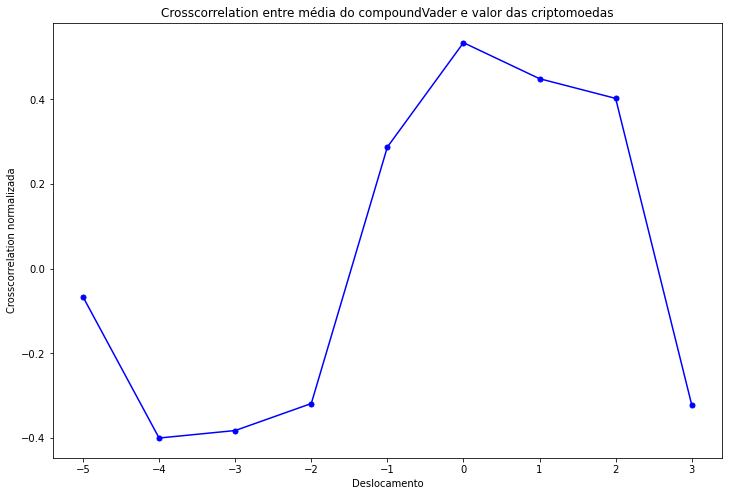

In [200]:
import numpy as np

# extrair valores relevantes do dataset de tweets e de criptomoedas
tweets_daily = dfTweets.groupby('Date')['compoundVader'].mean().values

crypto_daily = dfMarket.groupby('Date')['Value'].mean().values

# calcular a crosscorrelation e normalizar o resultado
crosscorr = np.correlate(crypto_daily - crypto_daily.mean(), tweets_daily - tweets_daily.mean(),  mode='same') / np.sqrt(np.sum((tweets_daily - tweets_daily.mean())**2) * np.sum((crypto_daily - crypto_daily.mean())**2))

# plot da crosscorrelation
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(np.arange(-len(crypto_daily) // 2, len(crypto_daily) // 2), crosscorr, color='blue', marker='o', markersize=5)

ax.set_xlabel('Deslocamento')
ax.set_ylabel('Crosscorrelation normalizada')
ax.set_title('Crosscorrelation entre média do compoundVader e valor das criptomoedas')
plt.show()


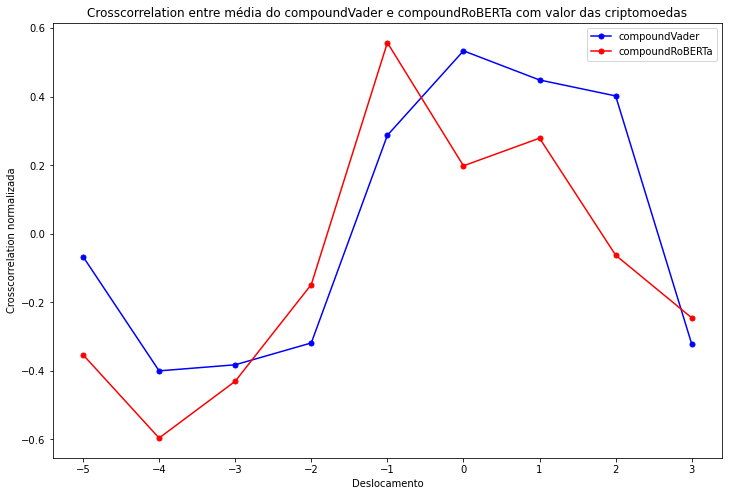

In [210]:
import numpy as np
import matplotlib.pyplot as plt

# Extrair valores relevantes do dataset de tweets e de criptomoedas
tweets_daily = dfTweets.groupby('Date')['compoundVader'].mean().values
roberta_daily = dfTweets.groupby('Date')['compoundRoBERTa'].mean().values
crypto_daily = dfMarket.groupby('Date')['Value'].mean().values

# Calcular as crosscorrelations e normalizar os resultados
crosscorr_vader = np.correlate(crypto_daily - crypto_daily.mean(), tweets_daily - tweets_daily.mean(), mode='same') / np.sqrt(np.sum((tweets_daily - tweets_daily.mean())**2) * np.sum((crypto_daily - crypto_daily.mean())**2))
crosscorr_roberta = np.correlate(crypto_daily - crypto_daily.mean(), roberta_daily - roberta_daily.mean(), mode='same') / np.sqrt(np.sum((roberta_daily - roberta_daily.mean())**2) * np.sum((crypto_daily - crypto_daily.mean())**2))

# Configurar o gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Plotar as crosscorrelations
ax.plot(np.arange(-len(crypto_daily) // 2, len(crypto_daily) // 2), crosscorr_vader, color='blue', marker='o', markersize=5, label='compoundVader')
ax.plot(np.arange(-len(crypto_daily) // 2, len(crypto_daily) // 2), crosscorr_roberta, color='red', marker='o', markersize=5, label='compoundRoBERTa')

ax.set_xlabel('Deslocamento')
ax.set_ylabel('Crosscorrelation normalizada')
ax.set_title('Crosscorrelation entre média do compoundVader e compoundRoBERTa com valor das criptomoedas')
ax.legend()

plt.show()


#### Granger Causality Tests

Once the correlation does not imply causality, causality tests are applied next

Granger Causality test is a statistical test that is used to determine if a given time series and it’s lags is helpful in explaining/forecasting the value of another series.

That is, the Granger Causality can be used to check if a given series is a leading indicator of a series we want to forecast/predict.

This test produces an F test statistic with a corresponding p-value. If the p-value is less than a certain significance level (i.e. α = .05), then we can reject the null hypothesis and conclude that we have sufficient evidence to say that time series x Granger-causes time series y.

In [201]:
# dfTweets['compoundVader'].isnull().values.any()

# print(np.isinf(dfTweets['compoundVader']).any()) 

- compoundVader

In [203]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundVader'].mean().reset_index()

dfMarket_daily = dfMarket[(dfMarket['Date'] >= '2022-09-06') & (dfMarket['Date'] <= '2022-09-14')]
dfMarket_daily = dfMarket_daily.groupby('Date')['Value'].mean().reset_index()

x = np.array(dfMarket_daily["Value"])
y = np.array(tweets_daily["compoundVader"])

data = pd.DataFrame({'x': x, 'y': y})
results = grangercausalitytests(data, maxlag=1)
lag1_results = results[1]
print("Granger Causality (lag 1) - Test statistic:", lag1_results[0]['ssr_ftest'][0])
print("Granger Causality (lag 1) - p-value:", lag1_results[0]['ssr_ftest'][1])



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6989  , p=0.2492  , df_denom=5, df_num=1
ssr based chi2 test:   chi2=2.7183  , p=0.0992  , df=1
likelihood ratio test: chi2=2.3401  , p=0.1261  , df=1
parameter F test:         F=1.6989  , p=0.2492  , df_denom=5, df_num=1
Granger Causality (lag 1) - Test statistic: 1.6989433947173023
Granger Causality (lag 1) - p-value: 0.2492140050774858


- compoundRoBERTa

In [215]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundRoBERTa'].mean().reset_index()

dfMarket_daily = dfMarket[(dfMarket['Date'] >= '2022-09-06') & (dfMarket['Date'] <= '2022-09-14')]
dfMarket_daily = dfMarket_daily.groupby('Date')['Value'].mean().reset_index()

x = np.array(dfMarket_daily["Value"])
y = np.array(tweets_daily["compoundRoBERTa"])

data = pd.DataFrame({'x': x, 'y': y})
results = grangercausalitytests(data, maxlag=2)
lag1_results = results[1]
# print("Granger Causality (lag 1) - Test statistic:", lag1_results[0]['ssr_ftest'][0])
# print("Granger Causality (lag 1) - p-value:", lag1_results[0]['ssr_ftest'][1])



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0443  , p=0.8417  , df_denom=5, df_num=1
ssr based chi2 test:   chi2=0.0708  , p=0.7901  , df=1
likelihood ratio test: chi2=0.0705  , p=0.7906  , df=1
parameter F test:         F=0.0443  , p=0.8417  , df_denom=5, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2957  , p=0.4356  , df_denom=2, df_num=2
ssr based chi2 test:   chi2=9.0698  , p=0.0107  , df=2
likelihood ratio test: chi2=5.8172  , p=0.0546  , df=2
parameter F test:         F=1.2957  , p=0.4356  , df_denom=2, df_num=2


In [205]:
# np.all(np.isfinite(x))

#### Autoencoder (professor disse que não fazia muito sentido porque não é algo certo, mas sim baseado em "achismos" dos utilizadores)

In [206]:
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras.models import Model

# # Agregar os dados por dia
# df_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()

# # Transformar os dados em uma matriz numpy
# X = df_daily.pivot(index='Date', columns='currency_name', values='Value').values

# # Normalizar os dados
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Definir a arquitetura do autoencoder
# input_dim = X.shape[1]
# hidden_dim = 10

# input_layer = Input(shape=(input_dim,))
# hidden_layer = Dense(hidden_dim, activation='relu')(input_layer)
# output_layer = Dense(input_dim, activation='linear')(hidden_layer)

# autoencoder = Model(inputs=input_layer, outputs=output_layer)

# # Compilar o modelo
# autoencoder.compile(optimizer='adam', loss='mse')

# # Treinar o modelo
# autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=32)

# # Codificar os dados
# encoder = Model(inputs=input_layer, outputs=hidden_layer)
# X_encoded = encoder.predict(X_scaled)

# # Imprimir a forma dos dados codificados
# print(X_encoded.shape)

----
#### Datas presentes no dataset

In [207]:
df1 = pd.read_csv('../data/bullishTweets.csv')
df1['Date'] = pd.to_datetime(dfTweets['Date']).dt.date
df1["Date"].unique()

array([datetime.date(2022, 9, 9), datetime.date(2022, 9, 11),
       datetime.date(2022, 9, 13), datetime.date(2022, 9, 12),
       datetime.date(2022, 9, 14), datetime.date(2022, 9, 10),
       datetime.date(2022, 9, 7), datetime.date(2022, 9, 8),
       datetime.date(2022, 9, 6)], dtype=object)

### TODO:
- Aplicar sliding window de 1 dia no grafico que compara os dois - `FEITO`
- Utilizar linear regression para previsao de preços  - `FEITO`
- Aplicar linear regression para verificar a correlacao se é significante ou nao - `Feito`
- scikit com x-> tweet e y-> valor crypto

usar o predict para a sliding window e comparar o ŷ com o valor real - `FEITO`
- p = pos - neg (usar a que estava a fazer que dá {'neg': 0.9763551, 'neu': 0.020687457, 'pos': 0.0029573673})